<a href="https://colab.research.google.com/github/sanketgawali123/icc-data-analysis/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [ ]:
#Mount your drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import statement
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

In [ ]:
#drive path and read the csv file
path='/content/drive/MyDrive/Colab Notebooks/Capstone Project/Hotel Booking/Hotel Bookings.csv'
data=pd.read_csv(path)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
data.shape

(119390, 32)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


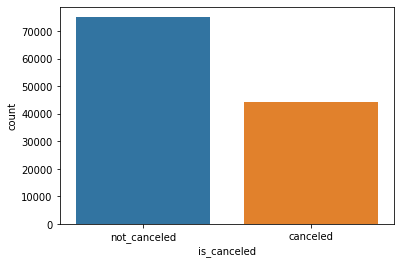

In [ ]:
#cancelation or not_cancelation
data['is_canceled'] = data.is_canceled.replace([1,0], ['canceled', 'not_canceled'])
canceled_data = data['is_canceled']
sns.countplot(canceled_data)

In [ ]:
#Analyzing the number of booking per month for year 2015 & 2017
monthly_booking=data['arrival_date_month'].value_counts()
monthly_booking.sort_index(inplace=True)  #sorting the data
monthly_booking

April        11089
August       13877
December      6780
February      8068
January       5929
July         12661
June         10939
March         9794
May          11791
November      6794
October      11160
September    10508
Name: arrival_date_month, dtype: int64

Text(0.5, 0, 'Month')

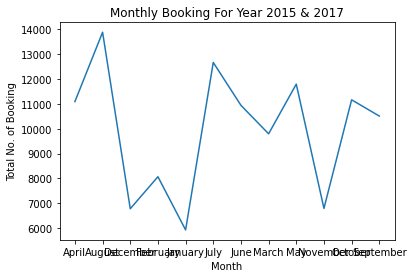

In [ ]:
#Create the plot object
plt.plot(monthly_booking)
plt.title('Monthly Booking For Year 2015 & 2017')
plt.ylabel('Total No. of Booking')
plt.xlabel('Month')

In [ ]:
#Filling All The Null Value With Non_zero Number
data['agent']=data['agent'].fillna(0) 

#data based on the hotel type
Resort_Hotel=data[data['hotel']=='Resort Hotel']
Resort_Hotel.fillna(0)
Resort_Hotel.info()

city_hotel=data[data['hotel']=='City Hotel']
city_hotel.fillna(0)
city_hotel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40060 entries, 0 to 40059
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           40060 non-null  object 
 1   is_canceled                     40060 non-null  object 
 2   lead_time                       40060 non-null  int64  
 3   arrival_date_year               40060 non-null  int64  
 4   arrival_date_month              40060 non-null  object 
 5   arrival_date_week_number        40060 non-null  int64  
 6   arrival_date_day_of_month       40060 non-null  int64  
 7   stays_in_weekend_nights         40060 non-null  int64  
 8   stays_in_week_nights            40060 non-null  int64  
 9   adults                          40060 non-null  int64  
 10  children                        40060 non-null  float64
 11  babies                          40060 non-null  int64  
 12  meal                            

In [ ]:
Resort_Hotel_copy=Resort_Hotel.copy()
city_hotel_copy=city_hotel.copy()

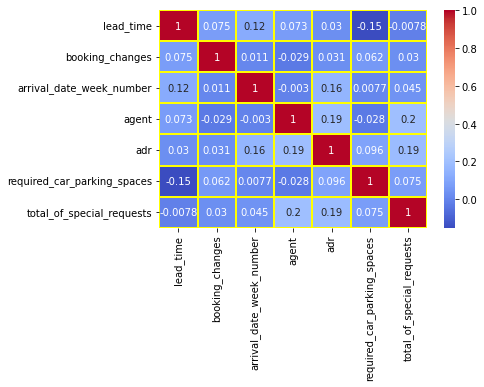

In [ ]:
#Heat map formation
Resort_Hotel_data=Resort_Hotel[['lead_time','booking_changes','arrival_date_week_number','agent','adr','required_car_parking_spaces','is_canceled','total_of_special_requests']]
heat_map_r=Resort_Hotel_data.corr()
sns.heatmap(heat_map_r, annot=True, cmap='coolwarm', linecolor='yellow', linewidth=1)

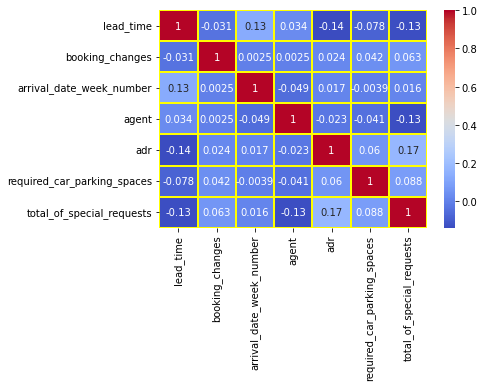

In [ ]:
city_hotel_data=city_hotel[['lead_time','booking_changes','arrival_date_week_number','agent','adr','required_car_parking_spaces','is_canceled','total_of_special_requests']]
heat_map_r=city_hotel_data.corr()
sns.heatmap(heat_map_r, annot=True, cmap='coolwarm', linecolor='yellow', linewidth=1)

Text(0.5, 0, 'customer_type')

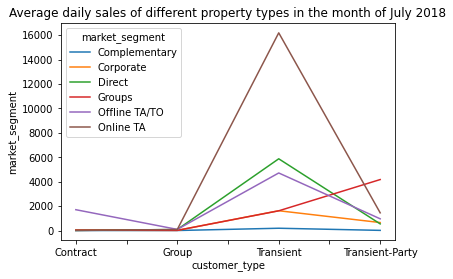

In [ ]:
#Analyzing the data based with repect to market segment & customer type on resort hotel
dist_data=Resort_Hotel.groupby(['customer_type','market_segment'])['customer_type'].count().unstack()   # grouping of data 
dist_data.plot()
plt.title('Average daily sales of different property types in the month of July 2018')
plt.ylabel('market_segment')
plt.xlabel('customer_type')

Text(0.5, 0, 'customer_type')

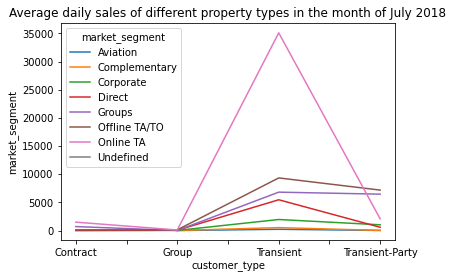

In [ ]:
#Analyzing the data based with repect to market segment & customer type on city hotel
dist_data=city_hotel.groupby(['customer_type','market_segment'])['customer_type'].count().unstack()   # grouping of data 
dist_data.plot()
plt.title('Average daily sales of different property types in the month of July 2018')
plt.ylabel('market_segment')
plt.xlabel('customer_type')

1.Direct comparision can be made between Resort & city hotel, which shows that in both case online transaction is the prefrence for payment. Also while comparing with the type of hotel we observed that city hotel have upper hand on reosrt hotel with repsect to transcation.

2.while other channel such as offline TA/TO has a same impact on both type of hotel.

Text(0, 0.5, 'index')

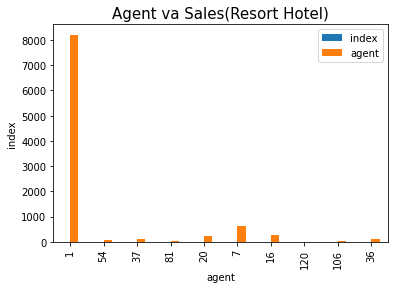

In [ ]:
#High Seal For Agent Resort Hotel
agent_sales=pd.DataFrame(Resort_Hotel['agent'].value_counts()).reset_index()
agent_sales=agent_sales.sort_values('index', ascending=True)
agent_seals=agent_sales[:10]
agent_seals.plot(kind='bar')
plt.title('Agent va Sales(Resort Hotel)',fontsize=15)
plt.xlabel('agent')
plt.ylabel('index')

Text(0, 0.5, 'index')

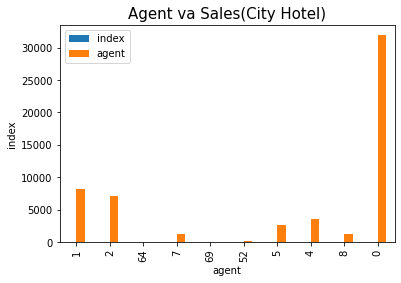

In [ ]:
#High Seal For Agent City Hotel
agent_sales=pd.DataFrame(city_hotel['agent'].value_counts()).reset_index()
agent_sales=agent_sales.sort_values('index',ascending=True)
agent_sales=agent_sales[:10]
agent_sales.plot(kind='bar')
plt.title('Agent va Sales(City Hotel)',fontsize=15)
plt.xlabel('agent')
plt.ylabel('index')


Text(0.5, 0, 'type')

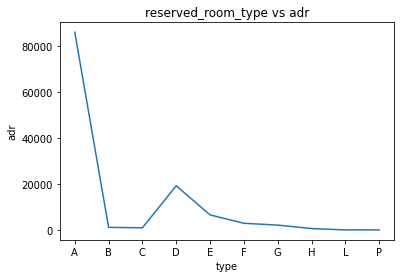

In [ ]:

room_type=data['reserved_room_type'].value_counts()     #Gettingthe value counts
room_type.sort_index(inplace=True)                     #sorting the data 

# Create the plot object
plt.plot(room_type)
plt.title('reserved_room_type vs adr')
plt.ylabel('adr')
plt.xlabel('type')

Text(0.5, 1.0, 'Reserved Room Type(Resort Hotel)')

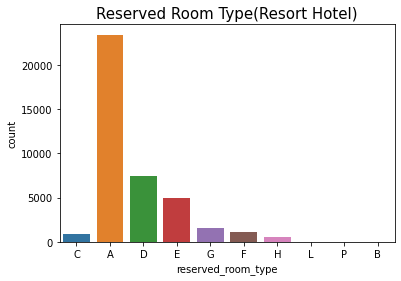

In [ ]:
sns.countplot(data=data, x=Resort_Hotel_copy['reserved_room_type']).set_title('Reserved Room Type(Resort Hotel)', fontsize=15)

Text(0.5, 1.0, 'Reserved Room Type(City Hotel)')

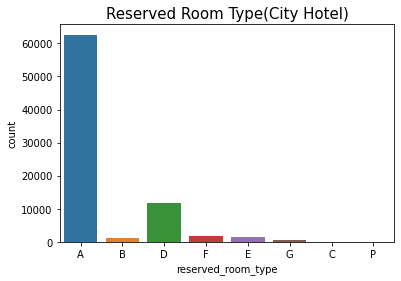

In [ ]:
sns.countplot(data=data, x=city_hotel_copy['reserved_room_type']).set_title('Reserved Room Type(City Hotel)', fontsize=15)

Text(0.5, 1.0, 'Reseved Room Type(City Hotal)')

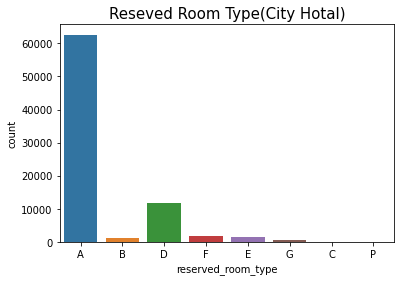

In [ ]:
sns.countplot(data=data, x=city_hotel_copy['reserved_room_type']).set_title('Reseved Room Type(City Hotal)', fontsize=15)

Text(0.5, 1.0, 'Meal(Resort Hotel)')

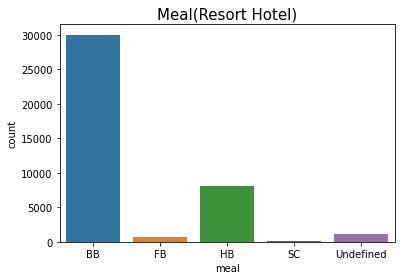

In [ ]:
sns.countplot(data=data, x=Resort_Hotel['meal']).set_title('Meal(Resort Hotel)', fontsize=15)

Text(0.5, 1.0, 'Meal(City Hotel)')

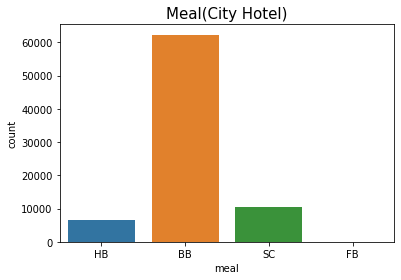

In [ ]:
sns.countplot(data=data, x=city_hotel['meal']).set_title('Meal(City Hotel)', fontsize=15)

Text(0.5, 1.0, 'Number Of Stays On Weekend Night(Resort Hotel)')

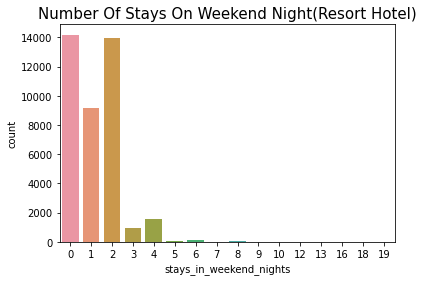

In [ ]:
#Number of Stays on Weekend night
sns.countplot(data=data, x =Resort_Hotel['stays_in_weekend_nights']).set_title('Number Of Stays On Weekend Night(Resort Hotel)', fontsize = 15)

Text(0.5, 1.0, 'Number Of Stays On Weekend Night(City Hotel)')

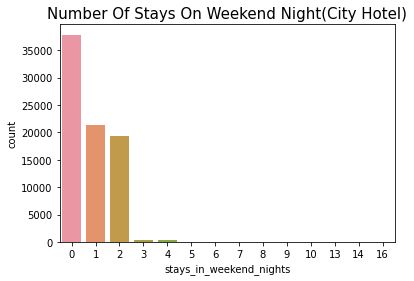

In [ ]:
sns.countplot(data=data, x =city_hotel['stays_in_weekend_nights']).set_title('Number Of Stays On Weekend Night(City Hotel)', fontsize = 15)

Text(0.5, 1.0, 'Number Of Stays On Weekday Night(Resort Hotel)')

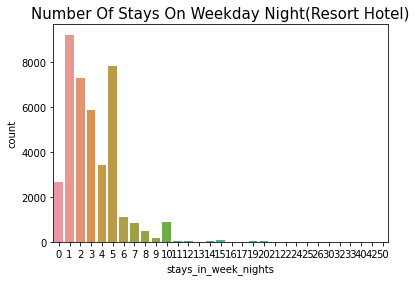

In [ ]:
#Number of Stays on Weekday Night
sns.countplot(data=data, x=Resort_Hotel['stays_in_week_nights']).set_title('Number Of Stays On Weekday Night(Resort Hotel)',fontsize=15)

Text(0.5, 1.0, 'Number Of Stays On Weekday Night(City Hotel)')

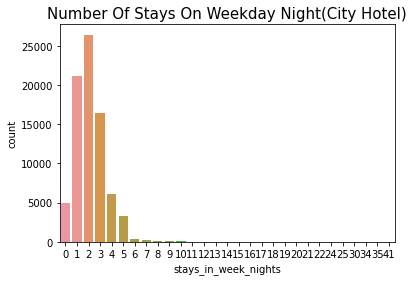

In [ ]:
sns.countplot(data=data, x=city_hotel['stays_in_week_nights']).set_title('Number Of Stays On Weekday Night(City Hotel)',fontsize=15)

# **Type OF Visitor**

Text(0.5, 1.0, 'Number of Adults')

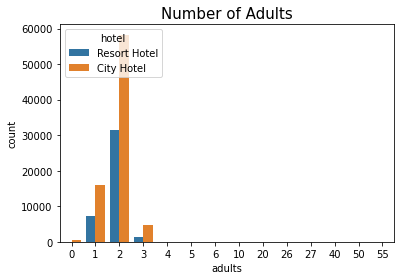

In [ ]:
sns.countplot(data=data, x='adults', hue='hotel').set_title('Number of Adults', fontsize=15)

Text(0.5, 1.0, 'Number of Children')

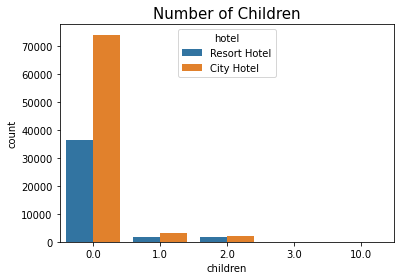

In [ ]:
sns.countplot(data=data, x='children',hue='hotel').set_title('Number of Children', fontsize=15)

Text(0.5, 1.0, 'Number of Babies')

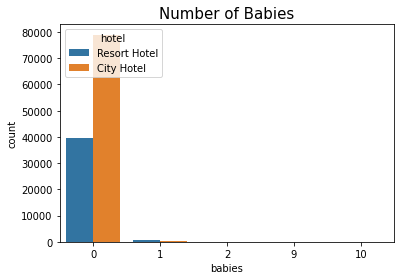

In [ ]:
sns.countplot(data=data, x='babies',hue='hotel').set_title('Number of Babies', fontsize=15)

Text(0.5, 1.0, 'Types Of Deposits')

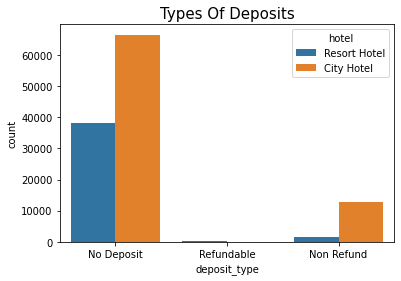

In [ ]:
#Deposite Types
sns.countplot(data=data, x='deposit_type', hue='hotel').set_title('Types Of Deposits', fontsize=15)

Text(0.5, 1.0, 'Graph Of Type Of Guests)')

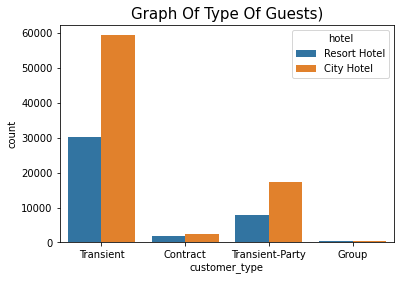

In [ ]:
#Types Of Guests
sns.countplot(data=data, x='customer_type', hue='hotel').set_title('Graph Of Type Of Guests)', fontsize=15)

Text(0.5, 1.0, 'Graph Of Repeated Guests')

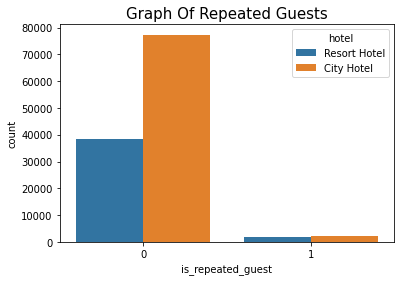

In [ ]:
#Repeated Guests
sns.countplot(data=data, x='is_repeated_guest', hue='hotel').set_title('Graph Of Repeated Guests', fontsize=15)